Side note: Tensor is  collection of matrixes in a matrix

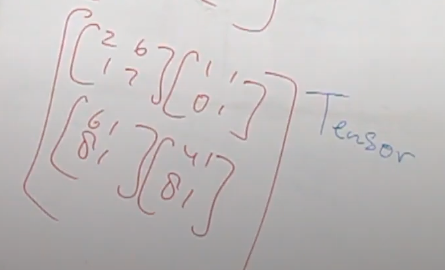



# In this notebook we are going to cover some of the fundamental of tensor using tensorflow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (a way to speed up you regular Python functions)
* Using GPUs with Tensorflow(or TPUs)
* Exercises to try yourself

## Introduction to Tensors


### tf.constant()

In [2]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# Creating tensors with tf.constant()
# tf.constant() creates a constant tensor
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
# Check the number of dimension of a tensor (ndim stands for number of dimensions)
# ndim = 0, karena scalar (berupa titik) tidak punya dimensi
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the dimension of our vector
# ndim = 1, karena vector (berupa garis) hanya memiliki 1 dimensi yaitu di sumbu x atau y
vector.ndim

1

In [ ]:
# Create a matrix (has more then 1 dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
# Checking the dimension of our matrix
# ndim matrix = 2, karena matrix berada di dua dimensi yaitu di sumbu x dan y
# jumlah banyaknya shape, pada kasus ini adalah 2 yaitu shape 2 dan shape 2 (shape.(2,2))
matrix.ndim

2

In [ ]:
# Create another matrix
another_matrix = tf.constant([[10.,7.],
                              [3.,2.],
                              [8.,9.]], dtype=float )
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float32)>

In [ ]:
# Checking the dimension of our matrix
# ndim matrix = 2, karena matrix berada di dua dimensi yaitu di sumbu x dan y atau
# jumlah banyaknya shape, pada kasus ini adalah 2 yaitu shape 3 dan shape 2 (shape.(3,2))
another_matrix.ndim

2

In [ ]:
# Let's create a tensor
tensor = tf.constant([[[1,2,3],
                       [4,5,6]],
                      [[7,8,9],
                       [10,11,12]],
                      [[13,14,15],
                       [16,17,18]]])

tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
# Checking the dimension of our tensor
# ndim tensor = 3, karena tensor ini berada di 3 dimensi yaitu sumbu x,y,z atau
# jumlah banyaknya shape pada kasus ini adalah 3 yaitu 3,2,3 (shape(3,2,3))
tensor.ndim

3

What we've created so:
* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: a n-dimensional array of numbers (when n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a)

### tf.Variable()

In [ ]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor,unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Let's try to change one of the elements in our changeable tensor
changeable_tensor[0] = 7

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [ ]:
changeable_tensor[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [ ]:
# Let's try to change one of the elements in our unchangeable tensor
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

The values of tf.constant() cannot be change and the values of tf.Variable() can be change using .assign.

So in conclusion:
* if you want to make a tensor that its values cannot be change, use tf.constant()

* if you want to make a tensor that you can change its values, use tf.Variable()

But this case is rare in practice as TensorFlow does this for you

![image_2024-03-25_103523323.png](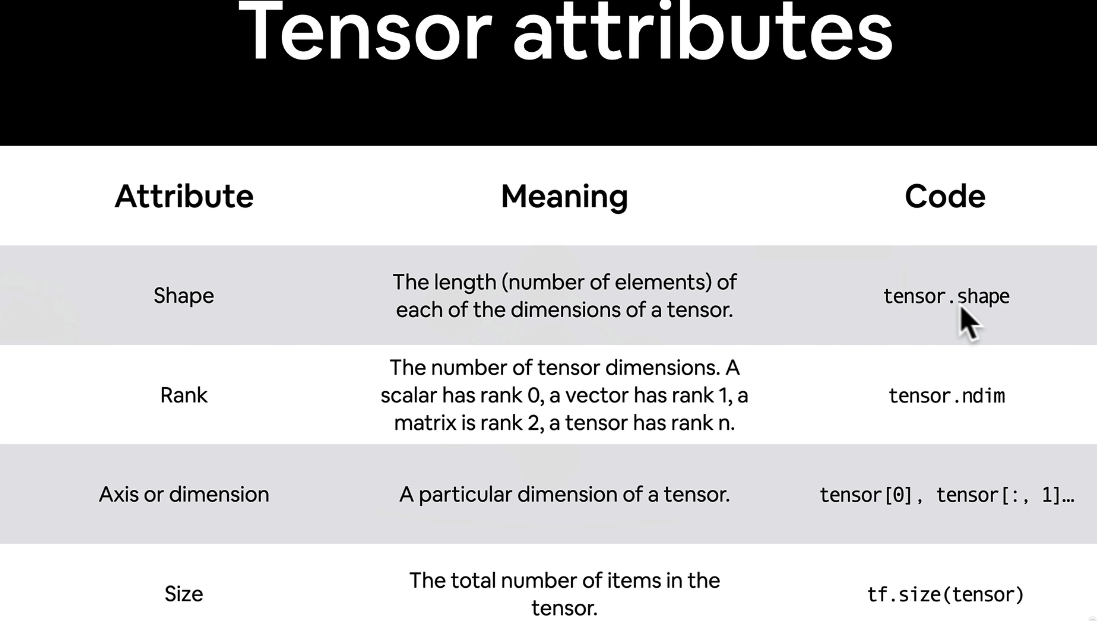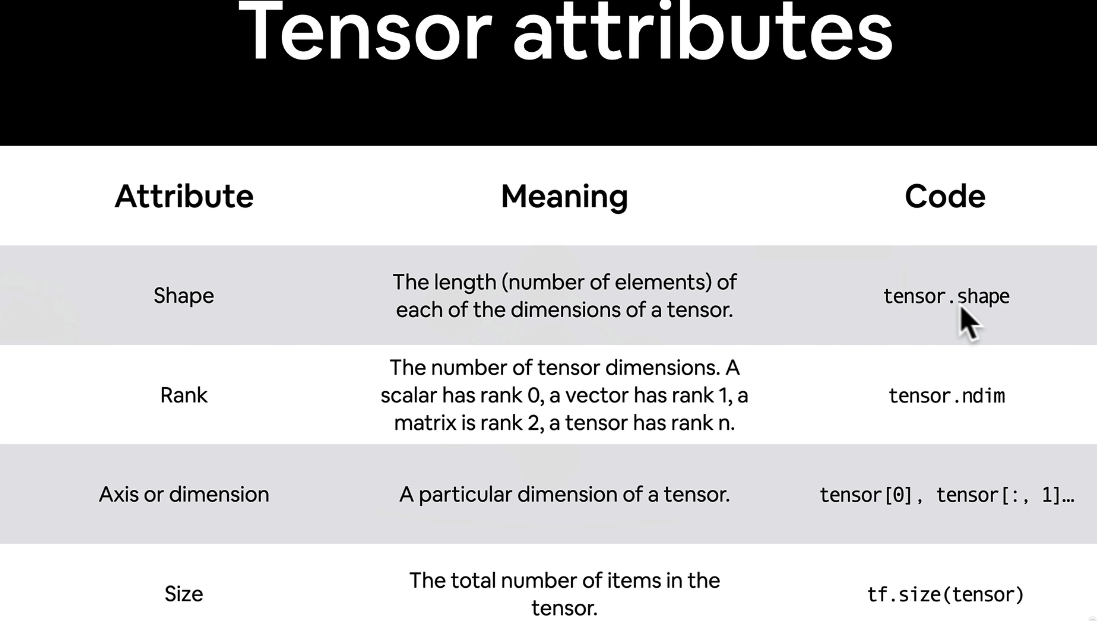)## Creating random tensors

Random tensor are tensors of some of arbitrary size which contain random numbers

In [ ]:
# Create two random tensors (but the same) tensors
# .normal() means using normal distribusion (bell graph/curve)
# setting the seed will grant you the same random every time
random_1 = tf.random.Generator.from_seed(42) # set seeed for reproductivity
random_1 = random_1.normal(shape = (3,2))
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

## Shuffle the order of elements in a tensor

In [9]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't affect learning)
not_shuffled = tf.constant([[10,7],
                           [3,4],
                           [2,5]])

# Shuffle our non-shuffle tensor
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42), not_shuffled

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>)

⚒ **Exercise** read through this TF documentation on random seed generation:
https://www.tensorflow.org/api_docs/python/tf/random/set_seed and pratice writing 5 random tensor and shuffle them.

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global random seed as well as the operation level random seed:
> Rule 4: "If both global and the operation seed are set: Both seeds are used in conjunction to determine the seed

In [ ]:
# Shuffle our non-shuffle tensor
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42), not_shuffled # operation level random seed

### If neither the global seed nor the operation seed is set, we get different results for every call to the random op and every re-run of the program:

In [10]:
print(tf.random.uniform([1]))  # generates 'A1'
print(tf.random.uniform([1]))  # generates 'A2'

tf.Tensor([0.6645621], shape=(1,), dtype=float32)
tf.Tensor([0.68789124], shape=(1,), dtype=float32)


In [11]:
print(tf.random.uniform([1]))  # generates 'A3'
print(tf.random.uniform([1]))  # generates 'A4'

tf.Tensor([0.7413678], shape=(1,), dtype=float32)
tf.Tensor([0.7402308], shape=(1,), dtype=float32)


### If the global seed is set but the operation seed is not set, we get different results for every call to the random op, but the same sequence for every re-run of the program:

In [12]:
tf.random.set_seed(1234)
print(tf.random.uniform([1]))  # generates 'A1'
print(tf.random.uniform([1]))  # generates 'A2'

tf.Tensor([0.5380393], shape=(1,), dtype=float32)
tf.Tensor([0.3253647], shape=(1,), dtype=float32)


(now run it again)

In [13]:
tf.random.set_seed(1234)
print(tf.random.uniform([1]))  # generates 'A1'
print(tf.random.uniform([1]))  # generates 'A2'

tf.Tensor([0.5380393], shape=(1,), dtype=float32)
tf.Tensor([0.3253647], shape=(1,), dtype=float32)


The reason we get 'A2' instead 'A1' on the second call of tf.random.uniform above is because the second call uses a different operation seed.

Note that tf.function acts like a re-run of a program in this case. When the global seed is set but operation seeds are not set, the sequence of random numbers are the same for each tf.function. For example:



In [14]:
tf.random.set_seed(1234)

@tf.function
def f():
  a = tf.random.uniform([1])
  b = tf.random.uniform([1])
  return a, b

@tf.function
def g():
  a = tf.random.uniform([1])
  b = tf.random.uniform([1])
  return a, b

print(f())  # prints '(A1, A2)'
print(g())  # prints '(A1, A2)'

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13047123], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>)
(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13047123], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>)


### If the operation seed is set, we get different results for every call to the random op, but the same sequence for every re-run of the program:

In [15]:
print(tf.random.uniform([1], seed=1))  # generates 'A1'
print(tf.random.uniform([1], seed=1))  # generates 'A2'

tf.Tensor([0.1689806], shape=(1,), dtype=float32)
tf.Tensor([0.7539084], shape=(1,), dtype=float32)


now run it again

In [16]:
print(tf.random.uniform([1], seed=1))  # generates 'A1'
print(tf.random.uniform([1], seed=1))  # generates 'A2'

tf.Tensor([0.4243431], shape=(1,), dtype=float32)
tf.Tensor([0.92531705], shape=(1,), dtype=float32)


NOTE:

The term "operational seed" may refer to the seed parameter used in individual random number generation operations in TensorFlow, such as tf.random.uniform. Unlike setting the global seed with tf.random.set_seed, which affects all random operations in the program, setting the seed parameter only affects the randomness of that specific operation. However, in multi-threaded or distributed environments, the behavior of individual operation seeds may not always be entirely deterministic due to parallel execution. For consistent behavior across all random operations, it's recommended to set the global seed using tf.random.set_seed.

In [19]:
tf.random.set_seed(1234)
print(tf.random.uniform([1], seed=1))  # generates 'A1'
print(tf.random.uniform([1], seed=1))  # generates 'A2'
tf.random.set_seed(1234)
print(tf.random.uniform([1], seed=1))  # generates 'A1'
print(tf.random.uniform([1], seed=1))  # generates 'A2'

tf.Tensor([0.1689806], shape=(1,), dtype=float32)
tf.Tensor([0.7539084], shape=(1,), dtype=float32)
tf.Tensor([0.1689806], shape=(1,), dtype=float32)
tf.Tensor([0.7539084], shape=(1,), dtype=float32)


### When multiple identical random ops are wrapped in a tf.function, their behaviors change because the ops no long share the same counter. For example:

In [20]:
@tf.function
def foo():
  a = tf.random.uniform([1], seed=1)
  b = tf.random.uniform([1], seed=1)
  return a, b
print(foo())  # prints '(A1, A1)'
print(foo())  # prints '(A2, A2)'

@tf.function
def bar():
  a = tf.random.uniform([1])
  b = tf.random.uniform([1])
  return a, b
print(bar())  # prints '(A1, A2)'
print(bar())  # prints '(A3, A4)'

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>)
(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7539084], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7539084], dtype=float32)>)
(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13047123], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1689806], dtype=float32)>)
(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.6087816], dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.7539084], dtype=float32)>)


## Other ways to make tensors

In [22]:
# Create a tensor of all ones
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [28]:
# Create a tensor of all zeros
tf.zeros([3,4])

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

In [27]:
# other syntax but the same result
tf.zeros(shape=(3,4))

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

## Turn NumPy arrays into TensorFlow tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing)

In [31]:
# You can also turn NumPy arrays into tensors
import numpy as np
numpy_A = np.arange(1,25,dtype=np.int32) # create np array between 1 and 25
numpy_A

# Different uses of capital letter (in this case X) and non capital letter (in this case y)
# X = tf.constant(for_some_matrix) # capital for matrix or tensor
# y = tf.constant(for_vector) # non capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [38]:
# Convert NumPy array to a tensor
B = tf.constant(numpy_A)

# Convert NumPy array to a tensor with 3 dimensional tensor
A = tf.constant(numpy_A, shape=(2,3,4))

A,B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

In [40]:
# The new element in shape=() must equal to the same n numbers of the previous array, which is 24
2*3*4 # shape=(2,3,4)

24

In [41]:
# How about shape=(3,8), which also equal to 24

D = tf.constant(numpy_A)
C = tf.constant(numpy_A, shape=(3,8))

C,D

(<tf.Tensor: shape=(3, 8), dtype=int32, numpy=
 array([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16],
        [17, 18, 19, 20, 21, 22, 23, 24]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

IT CHECKS OUT ✅

In [42]:
A.ndim, B.ndim, C.ndim, D.ndim

(3, 1, 2, 1)

## Getting information from tensors

When dealing with tensors you prolly want to be aware of the follong attributes:
* Shape
* Rank
* Axis or Dimension
* Size

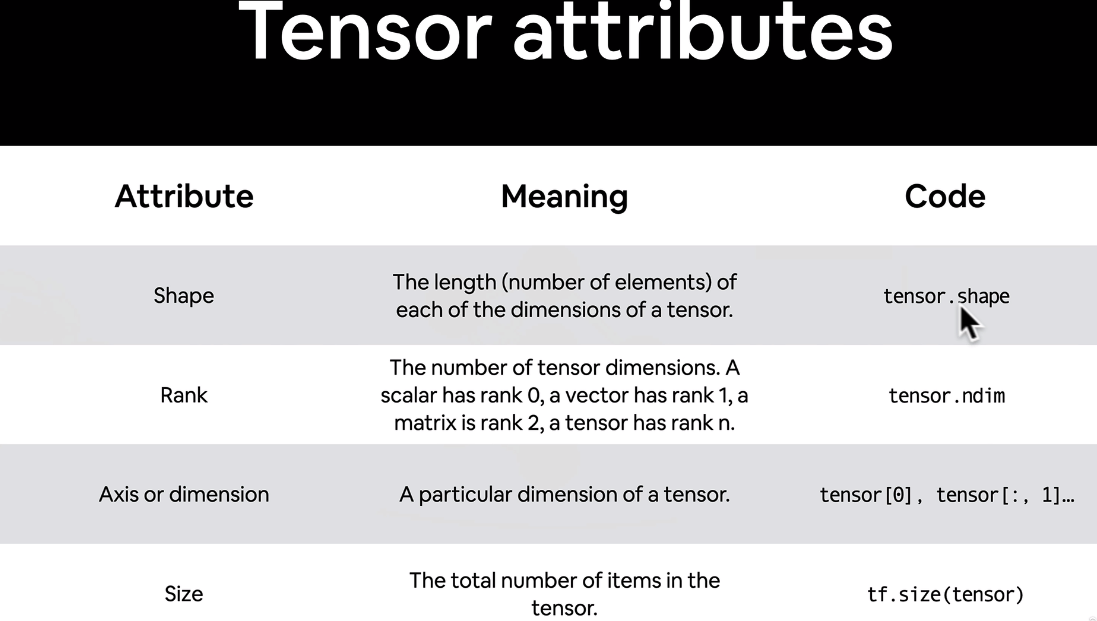

In [43]:
# Create a 4 rank tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=(2,3,4,5))
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [44]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [45]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)
# Size 120 comes from shape([2,3,4,5]) >>> 2*3*4*5 = 120

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [49]:
# Get various attributes of our tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimension (rank):", rank_4_tensor.ndim)
print("Shape of the tensor:", rank_4_tensor.shape)
print("Element along the 0 axis:", rank_4_tensor.shape[0])
print("Element along the last axis:", rank_4_tensor.shape[-1])
print("The total number of elements in our tensor:", tf.size(rank_4_tensor))
print("The total number of elements in our tensor:", tf.size(rank_4_tensor).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimension (rank): 4
Shape of the tensor: (2, 3, 4, 5)
Element along the 0 axis: 2
Element along the last axis: 5
The total number of elements in our tensor: tf.Tensor(120, shape=(), dtype=int32)
The total number of elements in our tensor: 120


## Indexing tensors

Tensors can be indexed just like Python lists

In [50]:
some_list = [1,2,3,4]
some_list[:2]

[1, 2]

In [51]:
# Get the first 2 element of each dimension
rank_4_tensor[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [53]:
# Get the first dimensions from each index except for the final one
rank_4_tensor[:1,:1,:1,:]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [55]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                             [3,4]])
rank_2_tensor.shape, rank_2_tensor.ndim, tf.size(rank_2_tensor)

(TensorShape([2, 2]), 2, <tf.Tensor: shape=(), dtype=int32, numpy=4>)

In [58]:
# Get the last item of each row of our rank 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

In [59]:
# Add in extra dimension to our 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [60]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

In [61]:
# Expand the 0-axis
tf.expand_dims(rank_2_tensor, axis=0) # expand the 0-axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]], dtype=int32)>

## Manipulating tensors (tensor operation)

**Basic operations**

`+`, `-`, `*`, `/`

In [4]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10,7],
                      [3,4]])
tensor, tensor + 10

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[20, 17],
        [13, 14]], dtype=int32)>)

In [7]:
# Multiplication also works
tensor, tensor*10

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[100,  70],
        [ 30,  40]], dtype=int32)>)

In [8]:
# Subtraction if you want
tensor, tensor-10

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 0, -3],
        [-7, -6]], dtype=int32)>)

In [9]:
# We can use the tensorflow built-in fucntion too
tf.multiply(tensor, 10) # this function is more faster then the normal calculation tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

# **Matrix Multiplication** (Dot Product)

In ML, Matrix Multiplication is one of the most common tensor operation

For better visualization: http://matrixmultiplication.xyz

There are two rulers our tensors (matrices) need to fulfil if we're going to matrix multiply them:
1. The Inner dimension must match

  (kolom matriks (m1) harus = baris matriks (m2), contoh m1.shape = 3,4 dan m2.shape = 4,5)


2. The Resulting matrix has the shape of the inner dimensions

  (hasil perkalian dua matriks m1 dan m2 memiliki dimensi = baris m1 dan kolom m2,
  
  contoh m1.shape = 3,4 dan m2.shape = 4,5 >>> m3 = m1 @ m2  dimana m3.shape = 3,5)

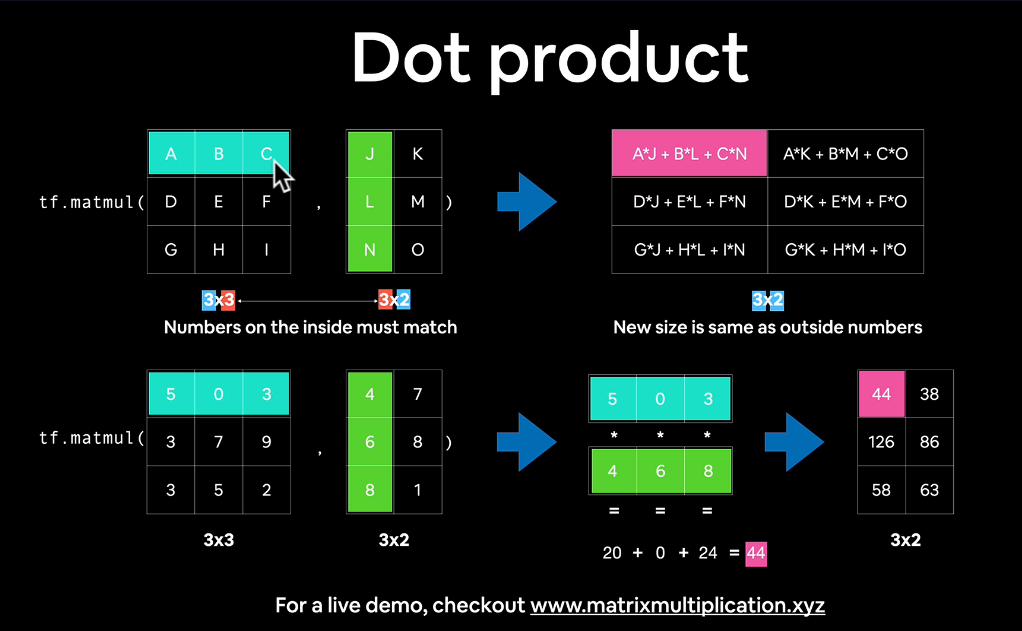

In [14]:
# Matrix multiplication in TensorFlow
print(tensor)
print('______________________________')

print('matrix multiplication (dot operation)')
print(tf.matmul(tensor, tensor))
print('______________________________')

print('multiplication elementwise')
print(tensor*tensor)
print('______________________________')

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)
______________________________
matrix multiplication (dot operation)
tf.Tensor(
[[121  98]
 [ 42  37]], shape=(2, 2), dtype=int32)
______________________________
multiplication elementwise
tf.Tensor(
[[100  49]
 [  9  16]], shape=(2, 2), dtype=int32)
______________________________


In [15]:
# Matrix multiplication with Python operator "@"
tensor @ tensor # its the same as tf.matmul() (dot operation)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [16]:
tensor.shape

TensorShape([2, 2])

In [18]:
# Create tensor of (3,2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])

# Create anothor (3,2) tensor
Y = tf.constant([[7,8],
                 [9,10],
                 [11,12]])
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [22]:
# Let's try to matrix multiply tensor of same shape
#X @ Y # or
tf.matmul(X,Y)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

📖**Resource**: Info and example of matrix multiplication

https://www.mathsisfun.com/algebra/matrix-multiplying.html

In [29]:
# Solution 1

# Reshape Y to shape (2, 3)
Y_reshaped = tf.reshape(Y, shape=(2, 3))
Y.shape, Y_reshaped.shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [27]:
X.shape

TensorShape([3, 2])

In [28]:
# Then Matrix Multiply them (X and Y)
X @ Y_reshaped

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [33]:
# Solution 2

# Reshape X instead of Y
X_reshaped = tf.reshape(X,(2,3))
X, X_reshaped

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [34]:
# Then Matrix Multiply them (X and Y)
tf.matmul(X_reshaped, Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [35]:
# Solution 3
# Reshape vs Transpose
X_transposed = tf.transpose(X)
X, X_reshaped, X_transposed

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>)

In [36]:
# Then Matrix Multiply them (X and Y)
X_transposed @ Y

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**The dot product**

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication using:
* `tf.matmul()`*
* `tf.tensordot()`*
* `@`*

In [37]:
X,Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [40]:
(1*7)+(3*9)+(5*11)

89

In [39]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X),Y, axes = 1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [41]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [42]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y,(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [43]:
# Check values of Y, reshape Y and transposed Y
print("Normal Y:")
print(Y, "\n") # "\n" is for newline

print("Y reshaped to (2,3):")
print(tf.reshape(Y,(2,3)), "\n") # "\n" is for newline

print("Y transposed")
print(tf.transpose(Y), "\n") # "\n" is for newline

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32) 



In [44]:
X

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)>

In [45]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

Generally, when performing matrix multiplication on two tensors and one of the axises doesn't line up, you will transpose (rather than reshape) one of the tensors to get satisify the matrix multiplication rules.

# Changing the datatype of a tensor